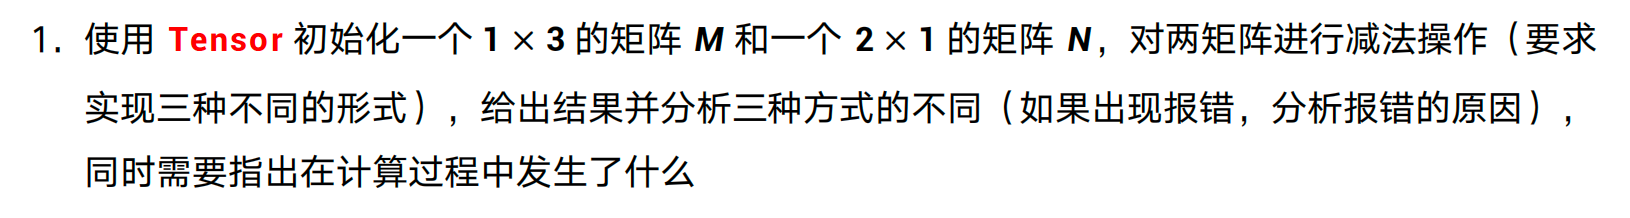

In [2]:
import torch
import numpy as np
M = torch.rand(1, 3)
N = torch.rand(2, 1)
print("M", M)
print("N", N)
print("M - N", M - N)
print("M.subtract(N)", M.subtract(N))
print("torch.subtract(M, N)", torch.subtract(M,N) )


M tensor([[0.9219, 0.5690, 0.1122]])
N tensor([[0.4834],
        [0.0387]])
M - N tensor([[ 0.4385,  0.0856, -0.3712],
        [ 0.8832,  0.5303,  0.0735]])
M.subtract(N) tensor([[ 0.4385,  0.0856, -0.3712],
        [ 0.8832,  0.5303,  0.0735]])
torch.subtract(M, N) tensor([[ 0.4385,  0.0856, -0.3712],
        [ 0.8832,  0.5303,  0.0735]])


这三种减法操作在本质上是等价的，都会尝试进行广播操作

在减法操作中，PyTorch 会尝试将这两个张量向兼容的形状扩展：
M 将被扩展为 (2, 3)：重复第一行来匹配 N 的形状。
N 将被扩展为 (2, 3)：重复第一列来匹配 M 的形状。


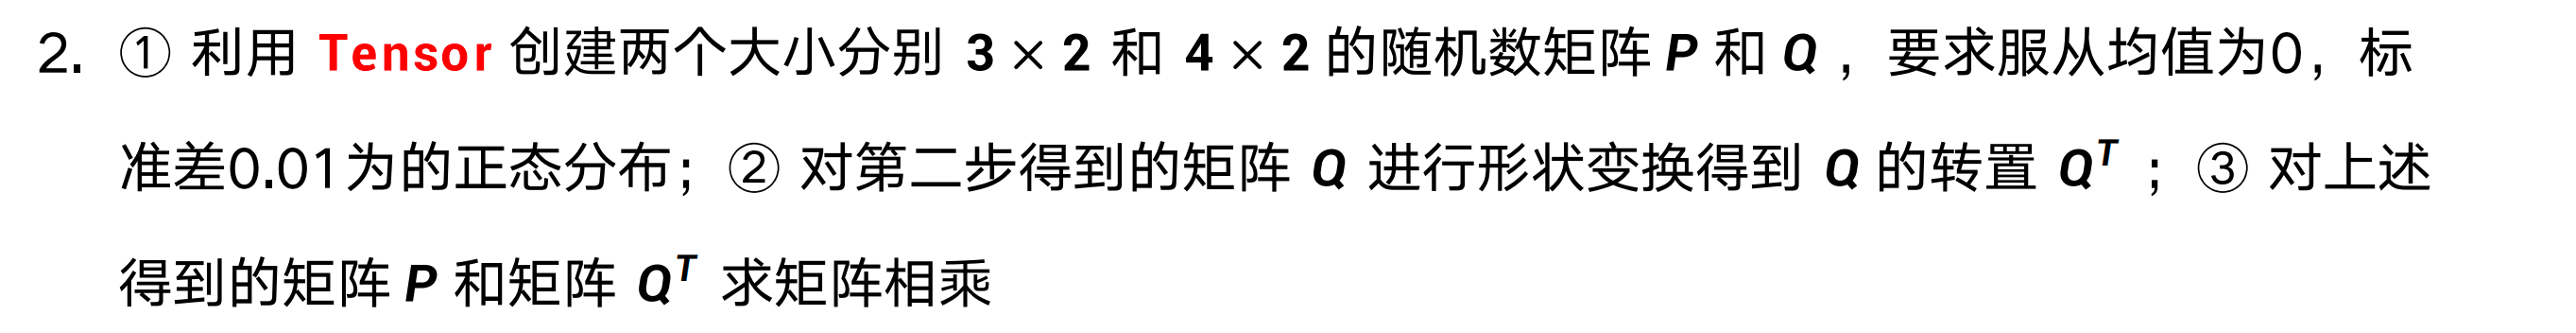

In [3]:
import torch
P = torch.normal(0, 0.01, (3, 2))
Q = torch.normal(0, 0.01, (4, 2))
print(P)
# 求转置
Q_T = Q.t()
print(Q_T)
# 求乘积
result = torch.matmul(P, Q_T)
print(result)

tensor([[ 0.0287,  0.0065],
        [ 0.0106, -0.0071],
        [-0.0004,  0.0109]])
tensor([[ 0.0051, -0.0109, -0.0110,  0.0033],
        [-0.0061, -0.0110,  0.0037, -0.0248]])
tensor([[ 1.0543e-04, -3.8592e-04, -2.9035e-04, -6.8537e-05],
        [ 9.7561e-05, -3.7831e-05, -1.4311e-04,  2.1074e-04],
        [-6.9322e-05, -1.1590e-04,  4.5539e-05, -2.7234e-04]])


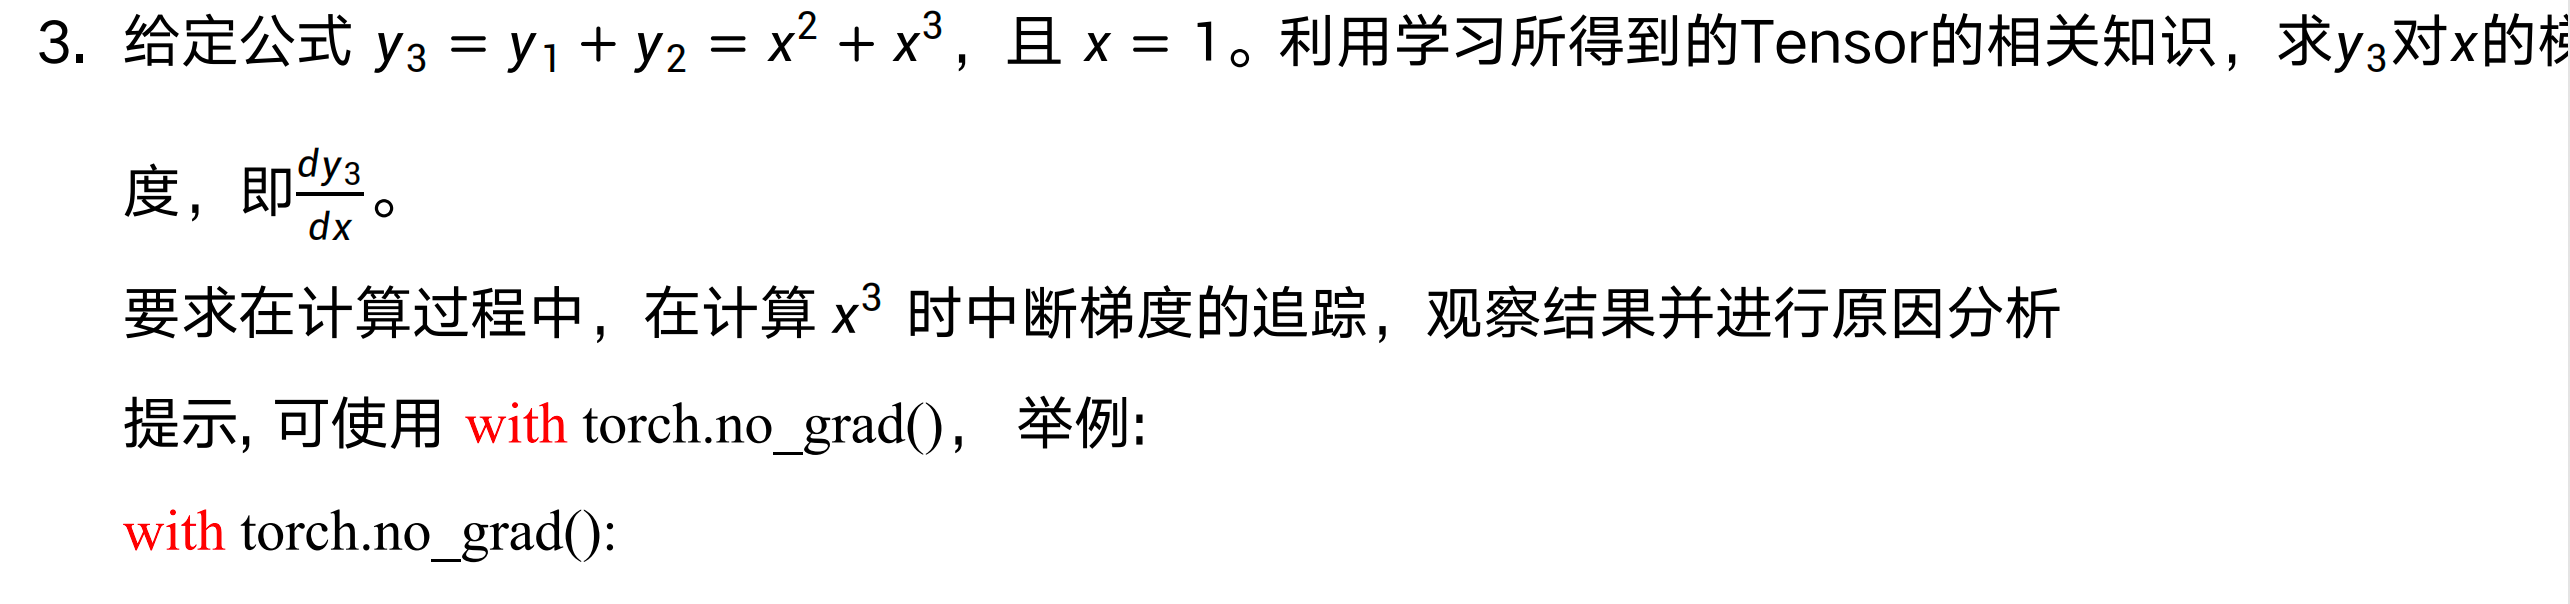

In [7]:
# 梯度计算
import torch
x = torch.tensor(1.0, requires_grad=True)
y1 = x**2
#中断追踪
with torch.no_grad():
    y2 = x**3
y3 = y1 + y2
# 反向传播计算梯度
y3.backward()
print("x 的梯度:", x.grad)

x 的梯度: tensor(2.)


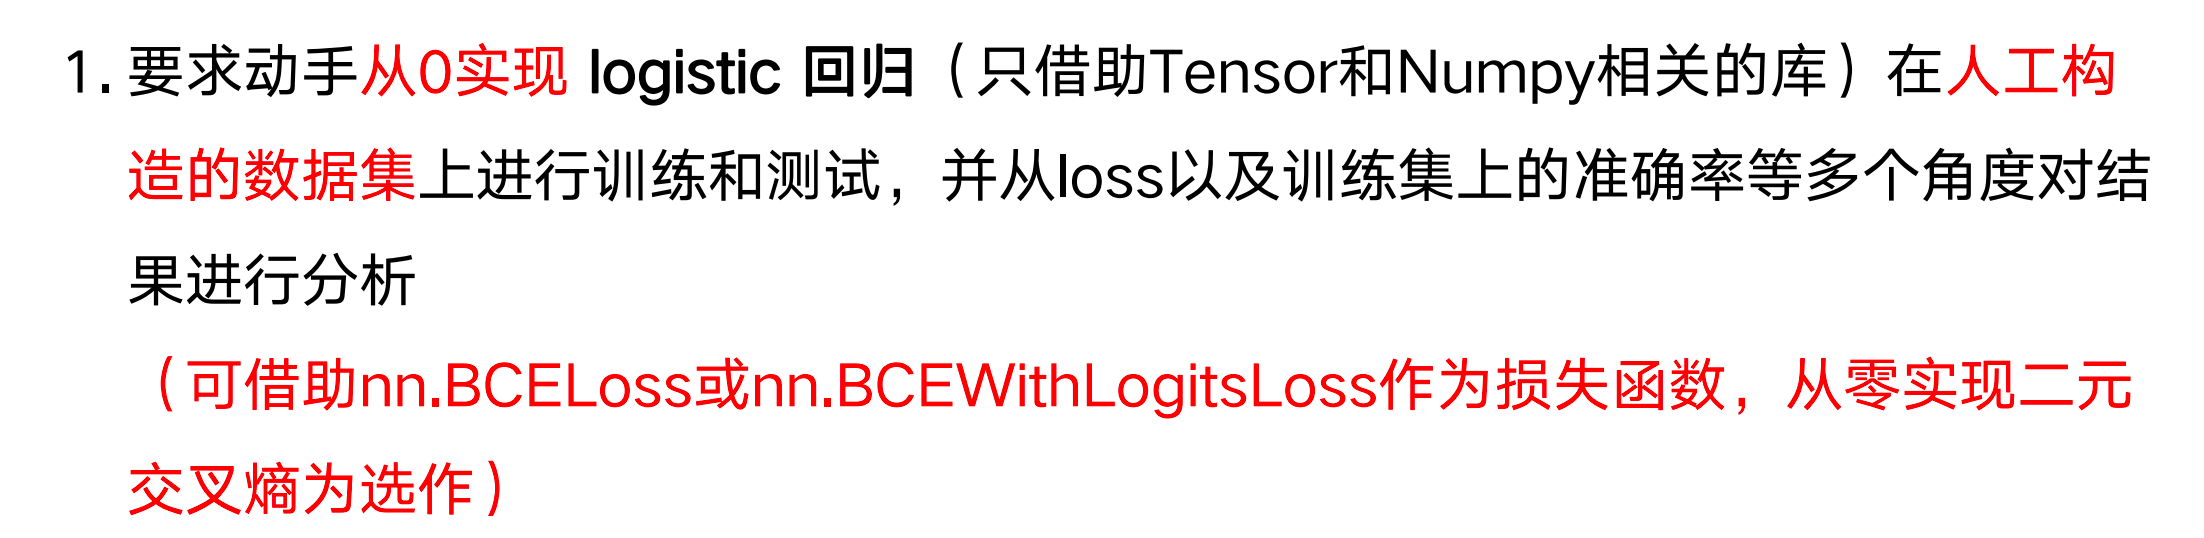

Epoch [10/100], Loss: 0.2271, Accuracy: 0.926667
Epoch [20/100], Loss: 0.1441, Accuracy: 0.953333
Epoch [30/100], Loss: 0.1082, Accuracy: 0.973333
Epoch [40/100], Loss: 0.0879, Accuracy: 0.980000
Epoch [50/100], Loss: 0.0746, Accuracy: 0.980000
Epoch [60/100], Loss: 0.0653, Accuracy: 0.980000
Epoch [70/100], Loss: 0.0582, Accuracy: 0.986667
Epoch [80/100], Loss: 0.0528, Accuracy: 0.986667
Epoch [90/100], Loss: 0.0484, Accuracy: 0.986667
Epoch [100/100], Loss: 0.0448, Accuracy: 0.986667
Test Loss: 0.0324, Test Accuracy: 1.000000


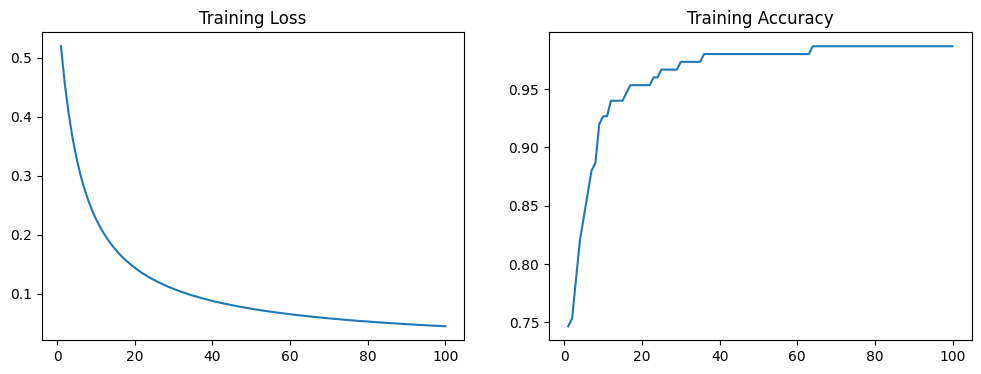

In [61]:
import torch
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def sigmod(z):
    return 1 / (1 + torch.exp(-z))


def model(x,w):
    return sigmod(torch.mm(x,w).squeeze(1))

# 定义二分类交叉熵损失函数
def BCELoss(preds, label):
    return -torch.sum(label * torch.log(preds) + (1 - label) * torch.log(1 - preds)) / len(preds)

#创建数据集
n_data = torch.ones(100, 2) 
x1 = torch.normal(2 * n_data, 1)
y1 = torch.zeros(100)  # 类型0
x2 = torch.normal(-2 * n_data, 1)  
y2 = torch.ones(100)  # 类型1 shape=(100, 1)
# 注意 x, y 数据的数据形式一定要像下面一样 (torch.cat 是合并数据)
x = torch.cat((x1, x2), 0).type(torch.FloatTensor)
y = torch.cat((y1, y2), 0).type(torch.FloatTensor)
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True)

w = torch.tensor(np.random.normal(0, 1, (2, 1)), dtype=torch.float32)
w.requires_grad_(requires_grad=True)
epochs = 100
lr = 0.1
losses = []
accuracies = []
#训练
for i in range(epochs):
    preds = model(X_train, w)
    loss = BCELoss(preds, y_train)
    losses.append(loss.item())
    # 计算梯度
    loss.backward()
    # 更新参数w
    w.data -= lr * w.grad
     # 清空梯度
    w.grad.data.zero_()
    predicted = (preds >= 0.5).float()
    accuracy = (predicted == y_train).float().mean().item()
    accuracies.append(accuracy)
    if (i + 1) % 10 == 0:
        print(f'Epoch [{i + 1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.6f}')
#测试
test = model(X_test, w)
e = BCELoss(test, y_test)
test = test.detach()
test[test >= 0.5] = 1
test[test < 0.5] = 0
print(f'Test Loss: {e.item():.4f}, Test Accuracy: {torch.sum(test == y_test).item() / len(y_test):.6f}')

x_label = np.arange(1,101)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x_label,losses)
plt.title("Training Loss")

plt.subplot(1, 2, 2)
x_label = np.arange(1,101)
plt.plot(x_label,accuracies)
plt.title("Training Accuracy")
plt.show()

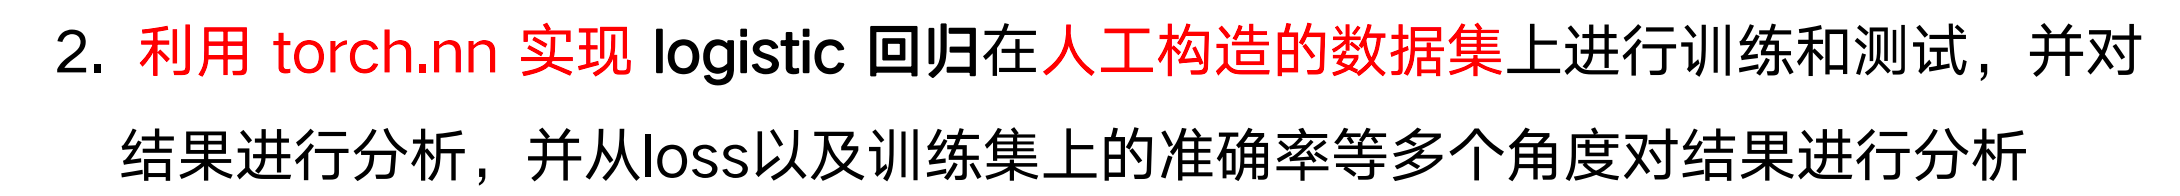

Epoch [10/100], Loss: 0.8481, Accuracy: 0.4325
Epoch [20/100], Loss: 0.6329, Accuracy: 0.5475
Epoch [30/100], Loss: 0.4937, Accuracy: 0.8075
Epoch [40/100], Loss: 0.4010, Accuracy: 0.9325
Epoch [50/100], Loss: 0.3367, Accuracy: 0.9638
Epoch [60/100], Loss: 0.2902, Accuracy: 0.9737
Epoch [70/100], Loss: 0.2552, Accuracy: 0.9812
Epoch [80/100], Loss: 0.2281, Accuracy: 0.9825
Epoch [90/100], Loss: 0.2065, Accuracy: 0.9850
Epoch [100/100], Loss: 0.1890, Accuracy: 0.9875
Test Loss: 0.1916, Test Accuracy: 1.0000


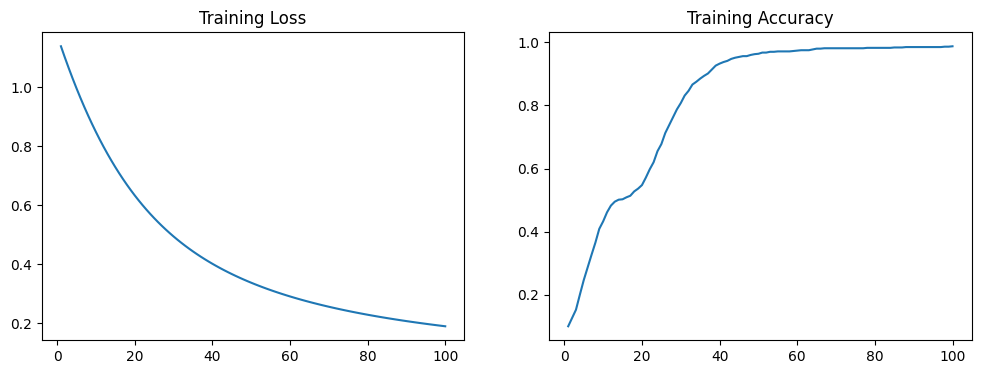

In [64]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
from sklearn.model_selection import train_test_split



n_data = torch.ones(500, 2)  # 数据的基本形态
    # 从二维高斯分布中取值，有两个均值，分别为[2,2]
x1 = torch.normal(2 * n_data, 1)  #
y1 = torch.zeros(500)  # 类型0 shape=(50, 1)
x2 = torch.normal(-2 * n_data, 1)  # 类型1
y2 = torch.ones(500)  # 类型1
# 注意 x, y 数据的数据形式一定要像下面一样 (torch.cat 是合并数据)
x = torch.cat((x1, x2), 0).type(torch.FloatTensor)
y = torch.cat((y1, y2), 0).type(torch.FloatTensor)

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



# 定义模型和损失函数
class LogisticRegressionModel(nn.Module):
    def __init__(self,input_dims):
        super().__init__()
        self.linear = nn.Linear(input_dims,1)

    def forward(self,x):
        out = self.linear(x)
        out = 1 / (1 + torch.exp(-out)).squeeze(1)
        return out

# 定义训练和测试函数
def train(model, X_train, y_train, lr, num_epochs):
    model.train()
    loss_history = []
    accuracy_history = []
    optimizer = optim.SGD(model.parameters(),lr = lr)
    loss = nn.BCELoss()
    for epoch in range(num_epochs):
        model_output = model(X_train)
        e = loss(model_output, y_train)
        loss_history.append(e.item())
        optimizer.zero_grad()
        e.backward()
        optimizer.step()
        predicted = (model_output >= 0.5).float()
        accuracy = (predicted == y_train).float().mean().item()
        accuracy_history.append(accuracy)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {e.item():.4f}, Accuracy: {accuracy:.4f}')
    
    return loss_history, accuracy_history

def test(model, X_test, y_test):
    model_output = model(X_test)
    loss = nn.BCELoss()
    e = loss(model_output, y_test)
    predicted = (model_output >= 0.5).float()
    accuracy = (predicted == y_test).float().mean().item()
    
    print(f'Test Loss: {e:.4f}, Test Accuracy: {accuracy:.4f}')
    return e.item(), accuracy

# 训练和测试模型
model = LogisticRegressionModel(2)
learning_rate = 0.01
num_epochs = 100

train_losses, train_accuracies = train(model, X_train, y_train, learning_rate, num_epochs)
test_loss, test_accuracy = test(model, X_test, y_test)

# 绘制训练损失和准确率
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses)
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies)
plt.title('Training Accuracy')

plt.show()

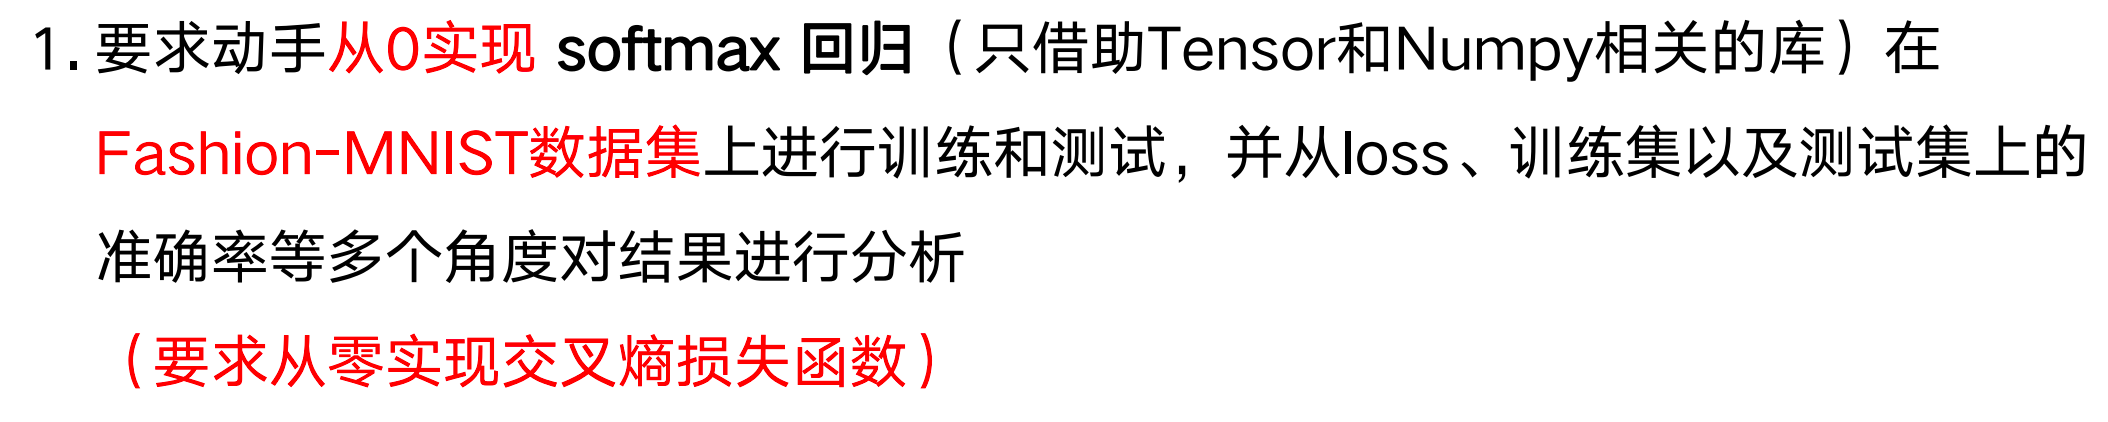

Epoch [1/10], Loss: 2.3696, Accuracy: 0.5973
Epoch [2/10], Loss: 1.2366, Accuracy: 0.7240
Epoch [3/10], Loss: 1.0517, Accuracy: 0.7500
Epoch [4/10], Loss: 0.9467, Accuracy: 0.7671
Epoch [5/10], Loss: 0.8773, Accuracy: 0.7777
Epoch [6/10], Loss: 0.8269, Accuracy: 0.7845
Epoch [7/10], Loss: 0.7860, Accuracy: 0.7914
Epoch [8/10], Loss: 0.7558, Accuracy: 0.7951
Epoch [9/10], Loss: 0.7263, Accuracy: 0.8001
Epoch [10/10], Loss: 0.7078, Accuracy: 0.8026
Test Loss: 0.7711, Test Accuracy: 0.7860


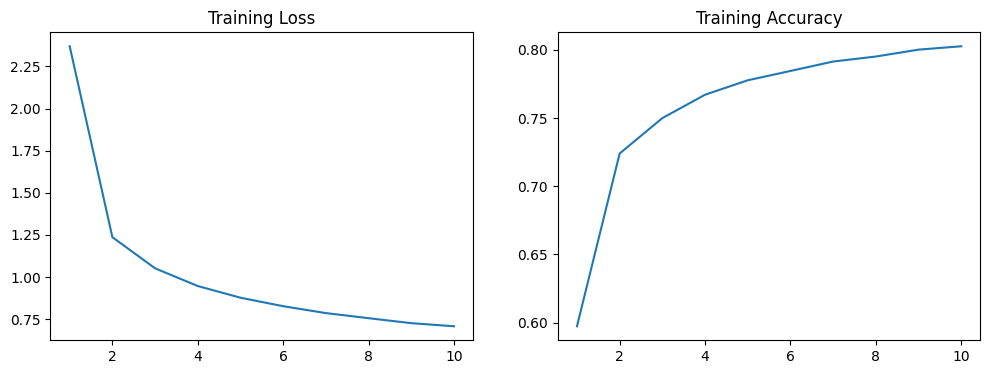

In [83]:
import torch
import torch.optim as optim
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.nn import functional as F


train_set = torchvision.datasets.FashionMNIST(
        root='./data'
        ,train=True
        ,download=True
        ,transform=transforms.Compose([
            transforms.ToTensor()
        ])
    )
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = torchvision.datasets.FashionMNIST(
        root='./data',
        train=False,
        download=True,
        transform=transforms.Compose([
            transforms.ToTensor()])
    )

test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)
def softmax(z):
    # 每一行做sum
    return torch.exp(z) / torch.sum(torch.exp(z),axis=1).unsqueeze(1)
def model(X,w):
    return softmax(torch.mm(X,w))

#交叉熵损失函数
def cross_entropy_loss(preds,labels):
    return -torch.sum(labels * torch.log(preds)) / len(preds)

w = torch.normal(0, 1, (784, 10))
w.requires_grad_(requires_grad=True)

def train(model, train_loader, num_epochs):
    train_losss = []
    train_accuracys = []
    for i in range(num_epochs):
        total_loss = 0
        correct = 0
        for batch in train_loader:
            images, labels = batch
            images = images.squeeze(1).reshape(-1, 784)
            preds = model(images, w)
            labels1 = F.one_hot(labels, 10)
            loss = cross_entropy_loss(preds, labels1)
            loss.backward()
            w.data -= lr * w.grad
            # 清空梯度
            w.grad.data.zero_()
            total_loss += loss.item()
            predicted = preds.argmax(dim=1)
            correct += (predicted == labels).sum().item()
        
        avg_loss = total_loss / len(train_loader)
        accuracy = correct / len(train_loader.dataset)
        train_losss.append(avg_loss)
        train_accuracys.append(accuracy)
        print(f'Epoch [{i + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')
    return train_losss, train_accuracys

def test(model, test_loader):
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for batch in test_loader:
            images, labels = batch
            images = images.squeeze(1).reshape(-1, 784)
            preds = model(images,w)
            labels1 = F.one_hot(labels, 10)
            loss = cross_entropy_loss(preds, labels1)
            total_loss += loss.item()
            predicted = preds.argmax(dim=1)
            correct += (predicted == labels).sum().item()
    
    avg_loss = total_loss / len(test_loader)
    accuracy = correct / len(test_loader.dataset)
    print(f'Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}')
    return avg_loss, accuracy

# 训练模型
num_epochs = 10
train_losses, train_accuracies = train(model, train_loader, num_epochs)

# 测试模型
test_loss, test_accuracy = test(model, test_loader)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses)
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies)
plt.title('Training Accuracy')

plt.show()

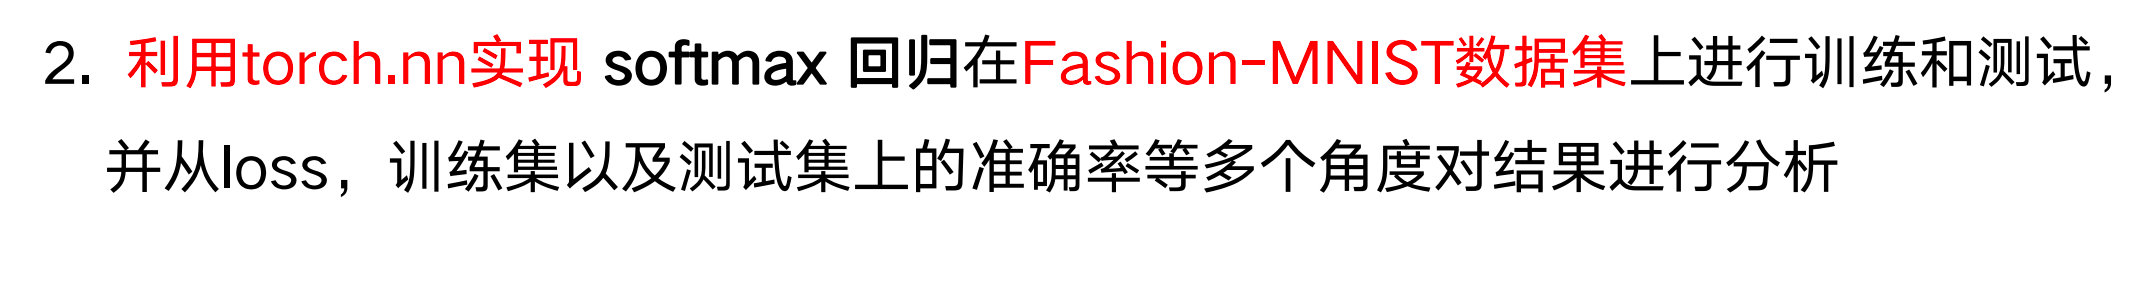

Epoch [1/10], Loss: 0.6780, Accuracy: 0.7765
Epoch [2/10], Loss: 0.5178, Accuracy: 0.8234
Epoch [3/10], Loss: 0.4858, Accuracy: 0.8338
Epoch [4/10], Loss: 0.4682, Accuracy: 0.8390
Epoch [5/10], Loss: 0.4567, Accuracy: 0.8430
Epoch [6/10], Loss: 0.4480, Accuracy: 0.8459
Epoch [7/10], Loss: 0.4410, Accuracy: 0.8488
Epoch [8/10], Loss: 0.4363, Accuracy: 0.8496
Epoch [9/10], Loss: 0.4320, Accuracy: 0.8520
Epoch [10/10], Loss: 0.4279, Accuracy: 0.8531
Test Loss: 0.4639, Test Accuracy: 0.8356


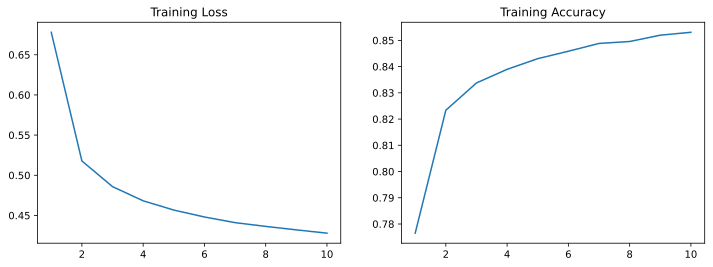

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 加载数据集
train_dataset = datasets.FashionMNIST(
    root='./data', train=True, transform=transform, download=True
)
test_dataset = datasets.FashionMNIST(
    root='./data', train=False, transform=transform, download=True
)

# 创建数据加载器
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=64, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=64, shuffle=False
)

# 定义模型
class SoftmaxRegression(nn.Module):
    def __init__(self):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(28 * 28, 10)  # 28x28 像素的输入，10 类输出
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # 展平操作
        outputs = self.linear(x)
        return outputs

model = SoftmaxRegression()

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练和测试函数
def train(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    train_losses = []
    train_accuracies = []
    for epoch in range(num_epochs):
        total_loss = 0
        correct = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
        
        avg_loss = total_loss / len(train_loader)
        accuracy = correct / len(train_loader.dataset)
        train_losses.append(avg_loss)
        train_accuracies.append(accuracy)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')
    return train_losses, train_accuracies

def test(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
    
    avg_loss = total_loss / len(test_loader)
    accuracy = correct / len(test_loader.dataset)
    print(f'Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}')
    return avg_loss, accuracy

# 训练模型
num_epochs = 10
train_losses, train_accuracies = train(model, train_loader, criterion, optimizer, num_epochs)

# 测试模型
test_loss, test_accuracy = test(model, test_loader, criterion)

# 绘制训练损失和准确率
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses)
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies)
plt.title('Training Accuracy')

plt.show()